In [1]:
# importing packages

import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import randint
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.ensemble import GradientBoostingClassifier


from sklearn import metrics
import os

In [2]:
df_original = pd.read_csv('train.csv')
df_test_original = pd.read_csv('test.csv')

In [3]:
df_original.head(10)


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df_test_original.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
5,20763,Male,19.799054,1.844751,59.605028,yes,yes,2.000000,4.000000,Sometimes,no,2.722063,no,2.000000,1.283673,no,Automobile
6,20764,Male,18.000000,1.728834,51.442293,yes,yes,1.202075,3.000000,Sometimes,no,1.087166,no,0.788585,1.000000,Sometimes,Public_Transportation
7,20765,Male,20.000000,1.810000,80.000000,yes,yes,2.000000,3.000000,Always,no,2.000000,no,3.000000,0.000000,no,Automobile
8,20766,Male,21.000000,1.700000,80.000000,yes,yes,2.000000,3.000000,Frequently,yes,2.000000,no,0.000000,2.000000,no,Public_Transportation
9,20767,Female,21.000000,1.560000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,1.000000,Sometimes,Public_Transportation


In [5]:
# Exclude the target variable from the training dataset for this comparison
categorical_features = [col for col in df_original.columns if df_original[col].dtype == 'object' and col != 'NObeyesdad']

print("Comparing Distribution of Categories in Categorical Variables:\n")
for feature in categorical_features:
    # Check if the feature is also in the test dataset
    if feature in df_test_original.columns:
        # Calculate the frequency of each category within the feature for both datasets
        train_freq = df_original[feature].value_counts(normalize=True).sort_index()
        test_freq = df_test_original[feature].value_counts(normalize=True).sort_index()

        # Create a DataFrame for easier comparison
        comparison_df = pd.DataFrame({'Train': train_freq, 'Test': test_freq})

        # Display the comparison
        print(f"Feature: {feature}")
        print(comparison_df.fillna(0))  # Fill NaN with 0 for categories not present in one of the datasets
        print("\n" + "-"*50 + "\n")
    else:
        print(f"Feature: {feature} is not present in the test dataset.")
        print("\n" + "-"*50 + "\n")


Comparing Distribution of Categories in Categorical Variables:

Feature: Gender
           Train      Test
Female  0.502071  0.503251
Male    0.497929  0.496749

--------------------------------------------------

Feature: family_history_with_overweight
        Train      Test
no   0.180364  0.177457
yes  0.819636  0.822543

--------------------------------------------------

Feature: FAVC
        Train      Test
no   0.085557  0.090824
yes  0.914443  0.909176

--------------------------------------------------

Feature: CAEC
               Train      Test
Always      0.023027  0.025939
Frequently  0.119087  0.116835
Sometimes   0.844446  0.844581
no          0.013441  0.012645

--------------------------------------------------

Feature: SMOKE
        Train      Test
no   0.988197  0.986994
yes  0.011803  0.013006

--------------------------------------------------

Feature: SCC
        Train      Test
no   0.966904  0.966474
yes  0.033096  0.033526

----------------------------------

In [6]:
#renaming some of the columns

df = df_original.rename(columns={
    'FAVC': 'highcaloriefoodconsumption',
    'FCVC': 'numberofmealswithveggies',
    'NCP' : 'noofmeals',
    'CAEC': 'eatfoodb/w_meals',
    'CH2O': 'litresofwaterdaily',
    'SCC': 'caloriesmonitored',
    'FAF': 'freqofworkoutperweek',
    'TUE' : 'timeofuseoftech',
    'CALC' : 'freqofalochol',
    'MTRANS' : 'modeoftransport',
    'NObeyesdad' : 'obesity_type'})

In [7]:
df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,highcaloriefoodconsumption,numberofmealswithveggies,noofmeals,eatfoodb/w_meals,SMOKE,litresofwaterdaily,caloriesmonitored,freqofworkoutperweek,timeofuseoftech,freqofalochol,modeoftransport,obesity_type
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [8]:
#remove id column

df.drop('id', axis=1, inplace=True)
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,highcaloriefoodconsumption,numberofmealswithveggies,noofmeals,eatfoodb/w_meals,SMOKE,litresofwaterdaily,caloriesmonitored,freqofworkoutperweek,timeofuseoftech,freqofalochol,modeoftransport,obesity_type
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   highcaloriefoodconsumption      20758 non-null  object 
 6   numberofmealswithveggies        20758 non-null  float64
 7   noofmeals                       20758 non-null  float64
 8   eatfoodb/w_meals                20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  litresofwaterdaily              20758 non-null  float64
 11  caloriesmonitored               20758 non-null  object 
 12  freqofworkoutperweek            

In [10]:
df.describe(include ='all')

,Gender,Age,Height,Weight,family_history_with_overweight,highcaloriefoodconsumption,numberofmealswithveggies,noofmeals,eatfoodb/w_meals,SMOKE,litresofwaterdaily,caloriesmonitored,freqofworkoutperweek,timeofuseoftech,freqofalochol,modeoftransport,obesity_type
count,20758,20758.000000,20758.000000,20758.000000,20758,20758,20758.000000,20758.000000,20758,20758,20758.000000,20758,20758.000000,20758.000000,20758,20758,20758
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,3,5,7
top,Female,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,10422,NaN,NaN,NaN,17014,18982,NaN,NaN,17529,20513,NaN,20071,NaN,NaN,15066,16687,4046
mean,NaN,23.841804,1.700245,87.887768,NaN,NaN,2.445908,2.761332,NaN,NaN,2.029418,NaN,0.981747,0.616756,NaN,NaN,NaN
std,NaN,5.688072,0.087312,26.379443,NaN,NaN,0.533218,0.705375,NaN,NaN,0.608467,NaN,0.838302,0.602113,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,20.000000,1.631856,66.000000,NaN,NaN,2.000000,3.000000,NaN,NaN,1.792022,NaN,0.008013,0.000000,NaN,NaN,NaN
50%,NaN,22.815416,1.700000,84.064875,NaN,NaN,2.393837,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.573887,NaN,NaN,NaN
75%,NaN,26.000000,1.762887,111.600553,NaN,NaN,3.000000,3.000000,NaN,NaN,2.549617,NaN,1.587406,1.000000,NaN,NaN,NaN


In [11]:
# Check for null values across the entire DataFrame
total_null_values = df.isnull().sum().sum()
print("Total Null Values:", total_null_values)

Total Null Values: 0


# EDA

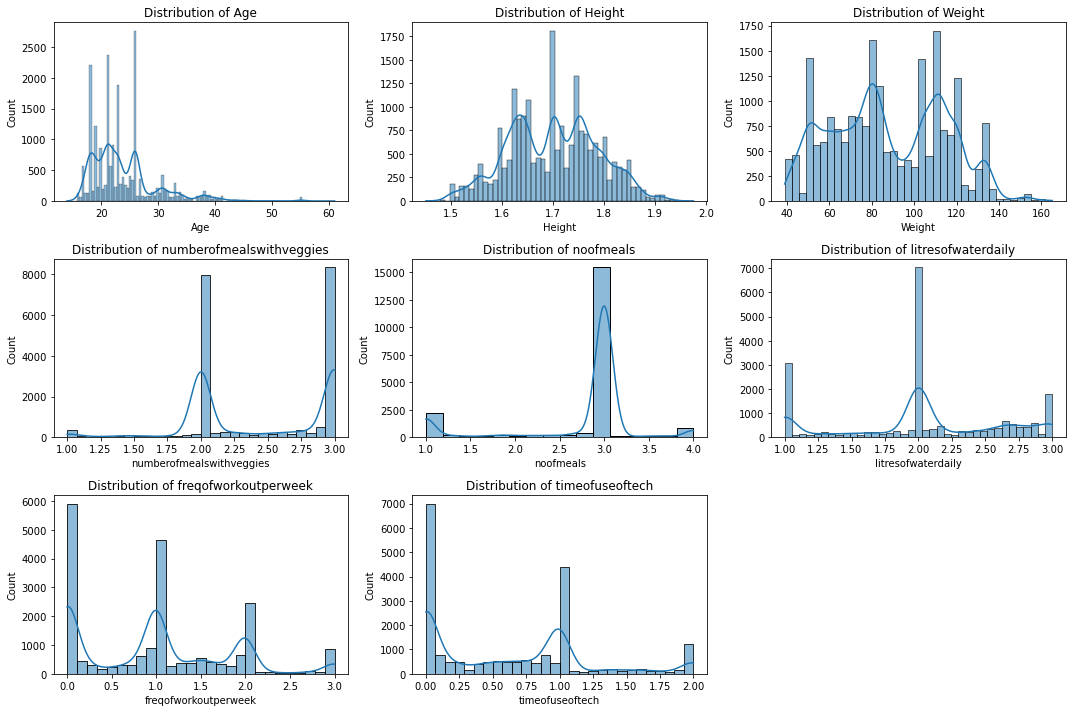

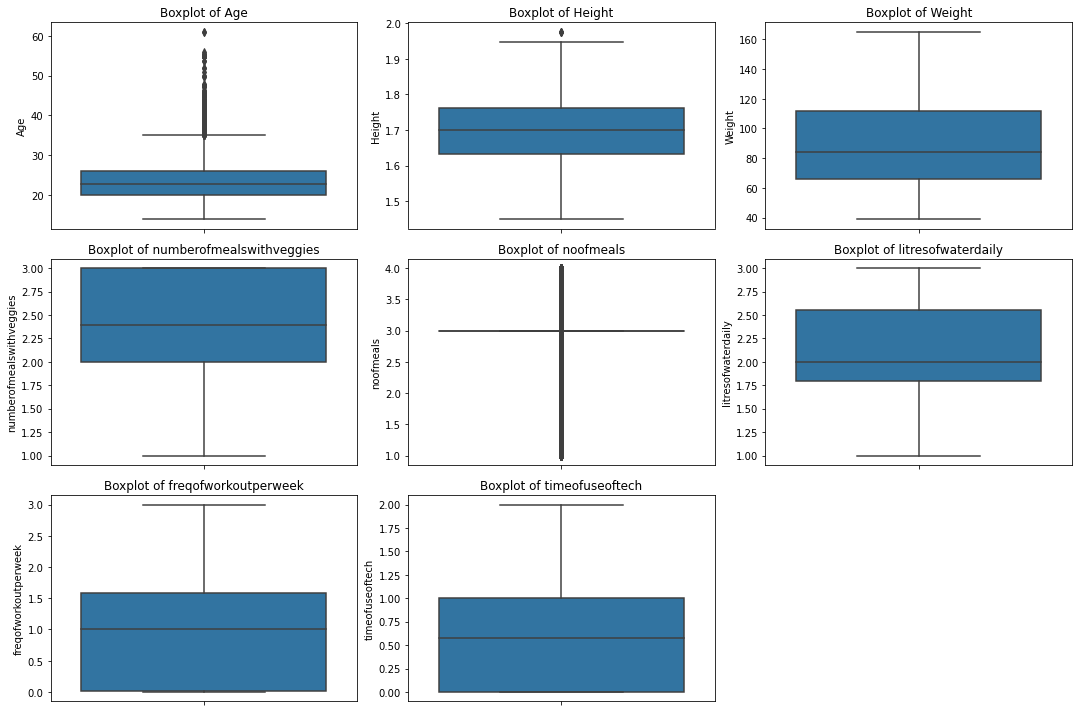

In [12]:
numerical_columns = ['Age', 'Height', 'Weight', 'numberofmealswithveggies', 'noofmeals', 'litresofwaterdaily', 'freqofworkoutperweek', 'timeofuseoftech']

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through the numerical columns and create a subplot for each histogram
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on your number of columns
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Similarly, for boxplots
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on your number of columns
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

In [13]:
# value counts for categorical variables
categorical_columns = ['Gender', 'family_history_with_overweight', 'highcaloriefoodconsumption', 'eatfoodb/w_meals', 'SMOKE', 'caloriesmonitored', 'freqofalochol', 'modeoftransport','obesity_type']

# Print value counts for each categorical column
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts(normalize=True))
    print("\n" + "-"*50 + "\n")

Value counts for Gender:
Female    0.502071
Male      0.497929
Name: Gender, dtype: float64

--------------------------------------------------

Value counts for family_history_with_overweight:
yes    0.819636
no     0.180364
Name: family_history_with_overweight, dtype: float64

--------------------------------------------------

Value counts for highcaloriefoodconsumption:
yes    0.914443
no     0.085557
Name: highcaloriefoodconsumption, dtype: float64

--------------------------------------------------

Value counts for eatfoodb/w_meals:
Sometimes     0.844446
Frequently    0.119087
Always        0.023027
no            0.013441
Name: eatfoodb/w_meals, dtype: float64

--------------------------------------------------

Value counts for SMOKE:
no     0.988197
yes    0.011803
Name: SMOKE, dtype: float64

--------------------------------------------------

Value counts for caloriesmonitored:
no     0.966904
yes    0.033096
Name: caloriesmonitored, dtype: float64

------------------------

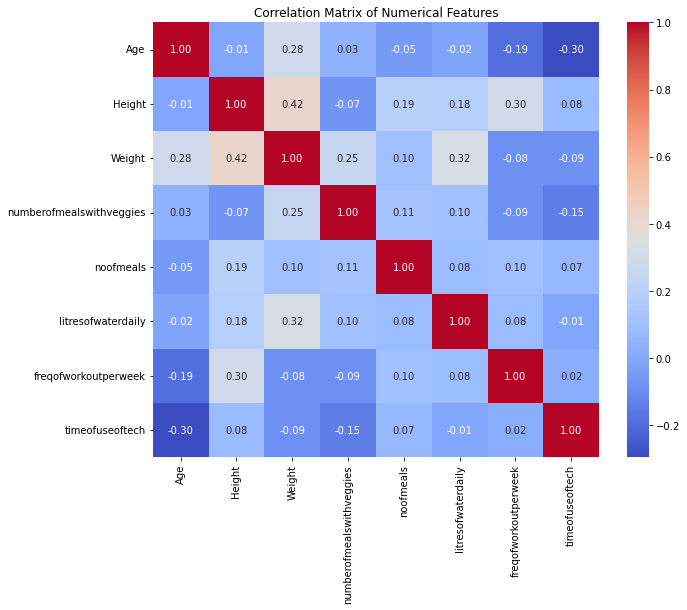

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

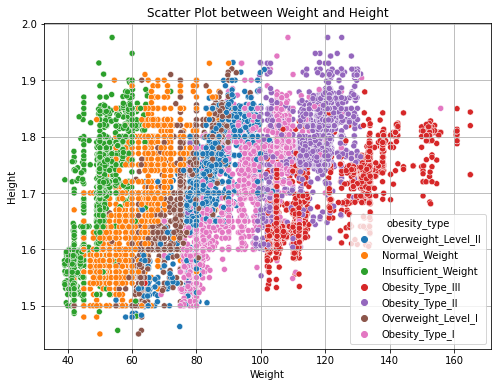

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Weight', y='Height',hue = 'obesity_type')
plt.title('Scatter Plot between Weight and Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()

# obesity against the numerical columns

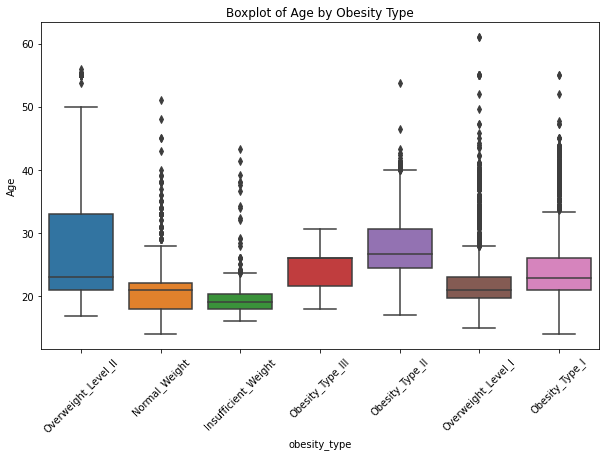

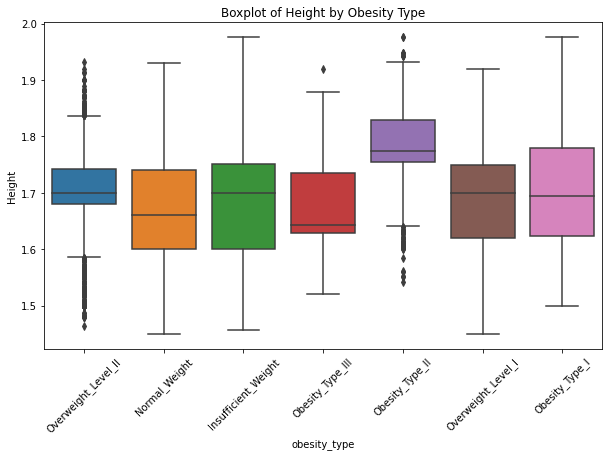

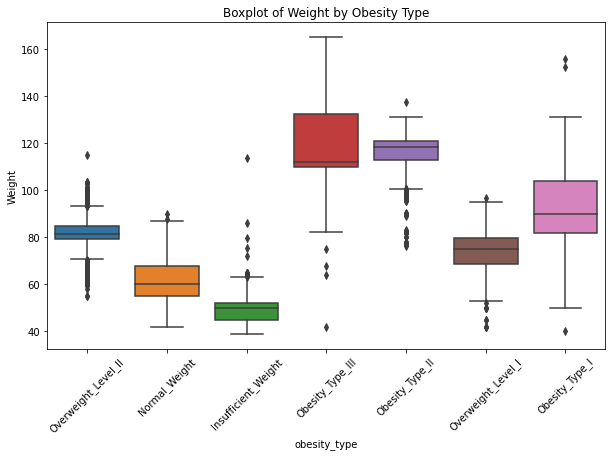

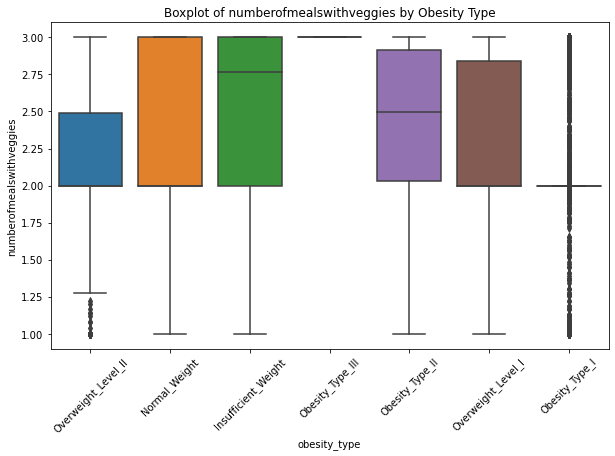

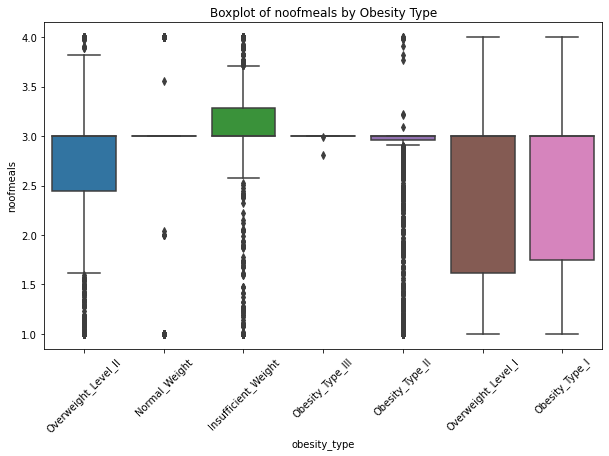

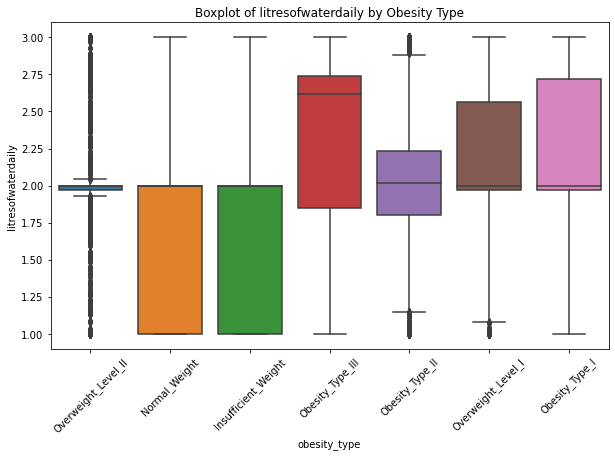

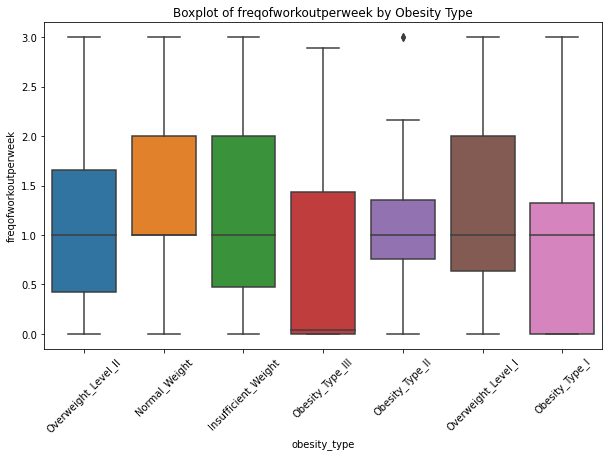

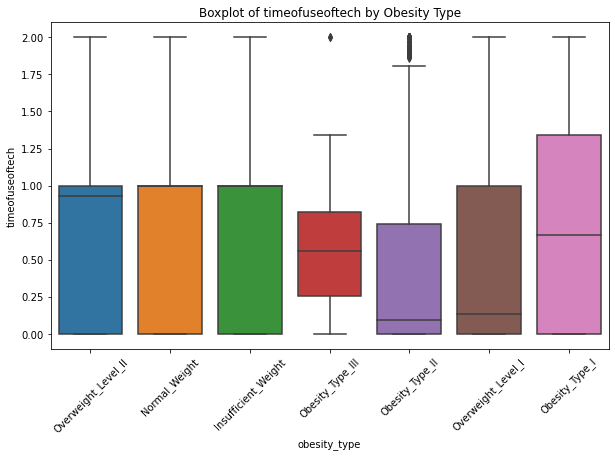

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette (you can customize this as needed)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# List of numerical columns
numerical_columns = ['Age', 'Height', 'Weight', 'numberofmealswithveggies', 'noofmeals', 'litresofwaterdaily', 'freqofworkoutperweek', 'timeofuseoftech']

# Plotting boxplots for each numerical feature against the obesity type
for i, column in enumerate(numerical_columns):
    plt.figure(figsize=(10, 6))  # Adjust the size as needed
    sns.boxplot(x='obesity_type', y=column, data=df, palette=colors)
    plt.title(f'Boxplot of {column} by Obesity Type')
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.show()

*high calorie food consumption against weight*

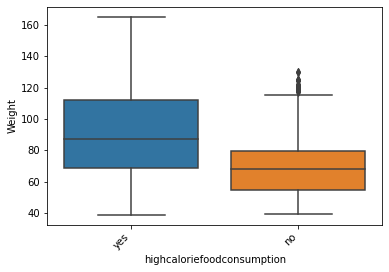

In [17]:
sns.boxplot(data = df,x = 'highcaloriefoodconsumption', y = 'Weight')
plt.xticks(rotation=45, ha='right')
plt.show()

**obesity against categorical variables**

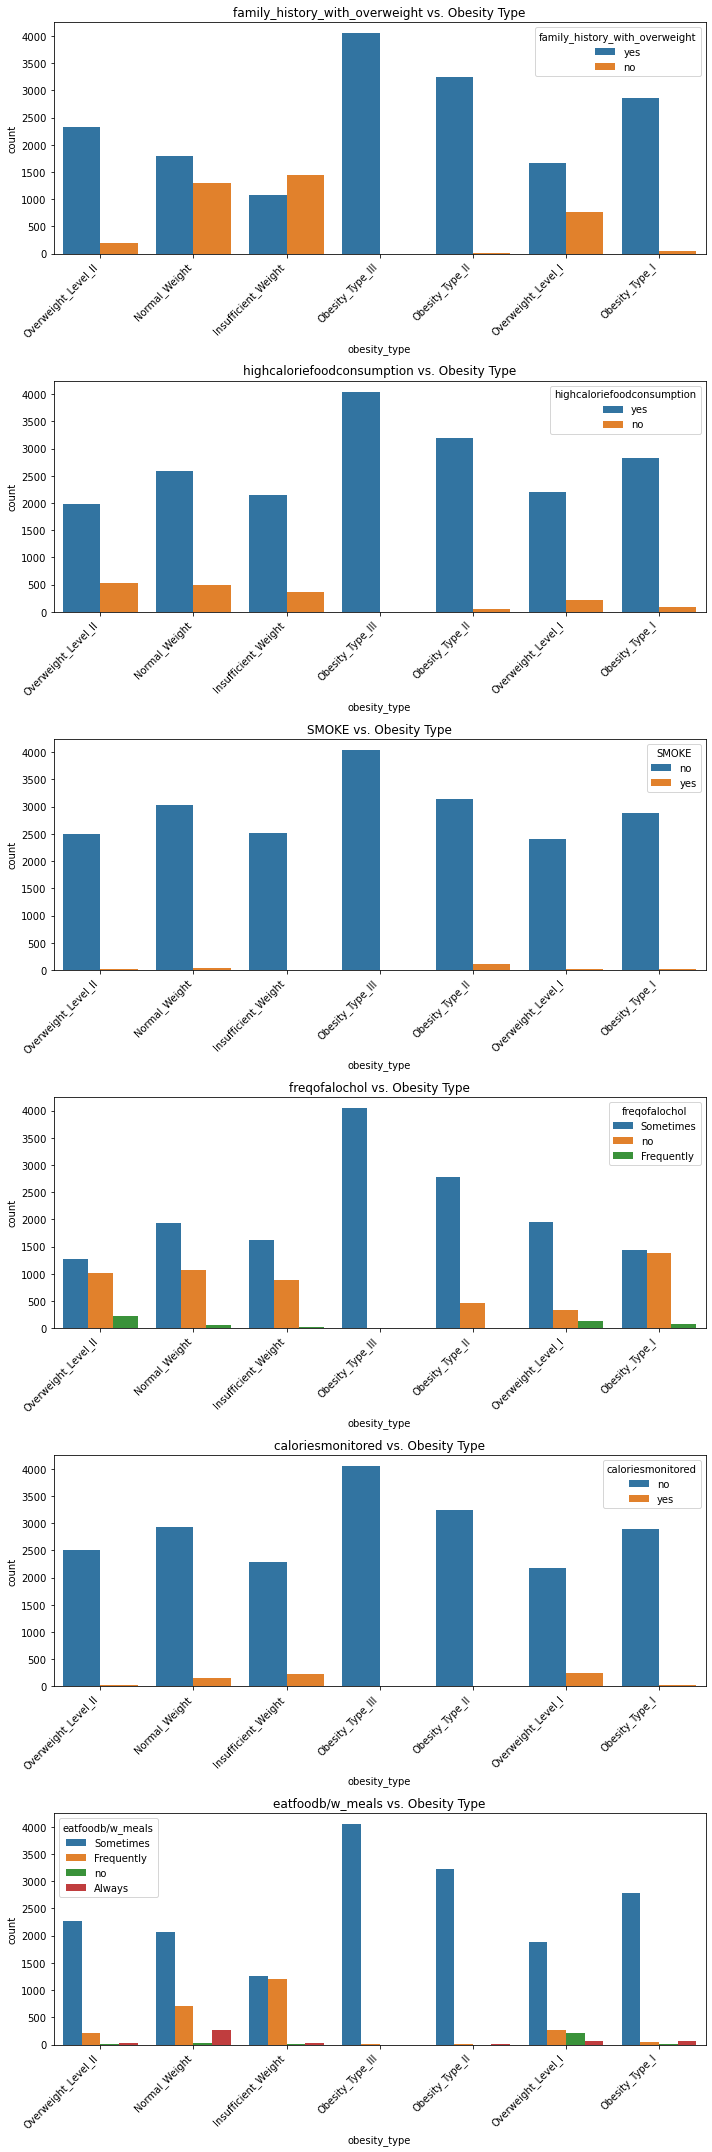

In [18]:
columns1 = ['family_history_with_overweight', 'highcaloriefoodconsumption', 'SMOKE', 'freqofalochol', 'caloriesmonitored', 'eatfoodb/w_meals']


# Create subplots
fig, axes = plt.subplots(nrows=len(columns1), ncols=1, figsize=(10, 5 * len(columns1)))

# Loop through each column and create count plots
for i, col in enumerate(columns1):
    sns.countplot(x='obesity_type', data=df, hue=col, ax=axes[i])
    axes[i].set_title(f'{col} vs. Obesity Type')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Define the categorical columns to encode
categorical_columns = ['Gender', 'family_history_with_overweight', 'highcaloriefoodconsumption', 'SMOKE', 'caloriesmonitored', 'modeoftransport']

# Loop through each categorical column and encode the data
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

# Check the encoded DataFrame
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,highcaloriefoodconsumption,numberofmealswithveggies,noofmeals,eatfoodb/w_meals,SMOKE,litresofwaterdaily,caloriesmonitored,freqofworkoutperweek,timeofuseoftech,freqofalochol,modeoftransport,obesity_type
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,3,Overweight_Level_II
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,0,Normal_Weight
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,3,Insufficient_Weight
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,3,Obesity_Type_III
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,3,Overweight_Level_II


In [20]:
from sklearn.preprocessing import OrdinalEncoder


# Mapping dictionaries for ordinal encoding
mapping_dict_obesity = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

mapping_dict_freqofalcohol = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2
}

mapping_dict_eatfoodb_w_meals = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[
    list(mapping_dict_obesity.keys()),
    list(mapping_dict_freqofalcohol.keys()),
    list(mapping_dict_eatfoodb_w_meals.keys())
])

df[['obesity_type', 'freqofalochol', 'eatfoodb/w_meals']] = ordinal_encoder.fit_transform(df[['obesity_type', 'freqofalochol', 'eatfoodb/w_meals']])

In [21]:
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,highcaloriefoodconsumption,numberofmealswithveggies,noofmeals,eatfoodb/w_meals,SMOKE,litresofwaterdaily,caloriesmonitored,freqofworkoutperweek,timeofuseoftech,freqofalochol,modeoftransport,obesity_type
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1.0,0,2.763573,0,0.000000,0.976473,1.0,3,3.0
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2.0,0,2.000000,0,1.000000,1.000000,0.0,0,1.0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1.0,0,1.910378,0,0.866045,1.673584,0.0,3,0.0
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1.0,0,1.674061,0,1.467863,0.780199,1.0,3,6.0
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1.0,0,1.979848,0,1.967973,0.931721,1.0,3,3.0
5,1,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,1.0,0,2.137550,0,1.930033,1.000000,1.0,3,0.0
6,1,29.883021,1.754711,112.725005,1,1,1.991240,3.000000,1.0,0,2.000000,0,0.000000,0.696948,1.0,0,5.0
7,1,29.891473,1.750150,118.206565,1,1,1.397468,3.000000,1.0,0,2.000000,0,0.598655,0.000000,1.0,0,5.0
8,1,17.000000,1.700000,70.000000,0,1,2.000000,3.000000,1.0,0,3.000000,1,1.000000,1.000000,0.0,3,2.0
9,0,26.000000,1.638836,111.275646,1,1,3.000000,3.000000,1.0,0,2.632253,0,0.000000,0.218645,1.0,3,6.0


In [22]:
labels  = df[['obesity_type']]
features = df.drop(columns = 'obesity_type')
train_data,valid_data,train_labels,valid_labels = train_test_split(features,labels,random_state = 42)

In [23]:
features

,Gender,Age,Height,Weight,family_history_with_overweight,highcaloriefoodconsumption,numberofmealswithveggies,noofmeals,eatfoodb/w_meals,SMOKE,litresofwaterdaily,caloriesmonitored,freqofworkoutperweek,timeofuseoftech,freqofalochol,modeoftransport
0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1.0,0,2.763573,0,0.000000,0.976473,1.0,3
1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2.0,0,2.000000,0,1.000000,1.000000,0.0,0
2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1.0,0,1.910378,0,0.866045,1.673584,0.0,3
3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1.0,0,1.674061,0,1.467863,0.780199,1.0,3
4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1.0,0,1.979848,0,1.967973,0.931721,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,1,25.137087,1.766626,114.187096,1,1,2.919584,3.000000,1.0,0,2.151809,0,1.330519,0.196680,1.0,3
20754,1,18.000000,1.710000,50.000000,0,1,3.000000,4.000000,2.0,0,1.000000,0,2.000000,1.000000,1.0,3
20755,1,20.101026,1.819557,105.580491,1,1,2.407817,3.000000,1.0,0,2.000000,0,1.158040,1.198439,0.0,3
20756,1,33.852953,1.700000,83.520113,1,1,2.671238,1.971472,1.0,0,2.144838,0,0.000000,0.973834,0.0,0


In [24]:
labels

,obesity_type
0,3.0
1,1.0
2,0.0
3,6.0
4,3.0
...,...
20753,5.0
20754,0.0
20755,5.0
20756,3.0


# XGBOOST CLASSIFIER (submission model)

In [25]:
'''# Define your parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.1, 0.2, 0.3]
}

# Initialize your model
model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)

# Provide the full dataset and labels
grid_search.fit(features, labels)

# The best parameters and score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)'''

'# Define your parameter grid\nparam_grid = {\n    \'n_estimators\': [100, 200, 300],\n    \'max_depth\': [3, 4, 5, 6, 7, 8],\n    \'learning_rate\': [0.1, 0.2, 0.3]\n}\n\n# Initialize your model\nmodel = xgb.XGBClassifier(random_state=42)\n\n# Initialize GridSearchCV\ngrid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2)\n\n# Provide the full dataset and labels\ngrid_search.fit(features, labels)\n\n# The best parameters and score from the grid search\nprint("Best Parameters:", grid_search.best_params_)\nprint("Best Score:", grid_search.best_score_)'

In [26]:
df_test = df_test_original.rename(columns={
    'FAVC': 'highcaloriefoodconsumption',
    'FCVC': 'numberofmealswithveggies',
    'NCP' : 'noofmeals',
    'CAEC': 'eatfoodb/w_meals',
    'CH2O': 'litresofwaterdaily',
    'SCC': 'caloriesmonitored',
    'FAF': 'freqofworkoutperweek',
    'TUE' : 'timeofuseoftech',
    'CALC' : 'freqofalochol',
    'MTRANS' : 'modeoftransport'})

In [27]:
df_test.drop('id', axis=1, inplace=True)


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   highcaloriefoodconsumption      13840 non-null  object 
 6   numberofmealswithveggies        13840 non-null  float64
 7   noofmeals                       13840 non-null  float64
 8   eatfoodb/w_meals                13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  litresofwaterdaily              13840 non-null  float64
 11  caloriesmonitored               13840 non-null  object 
 12  freqofworkoutperweek            

In [29]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Define the categorical columns to encode
categorical_columns = ['Gender', 'family_history_with_overweight', 'highcaloriefoodconsumption', 'SMOKE', 'caloriesmonitored', 'modeoftransport']

# Loop through each categorical column and encode the data
for column in categorical_columns:
    df_test[column] = le.fit_transform(df_test[column])

# Mapping dictionaries for ordinal encoding
mapping_dict_freqofalcohol = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

mapping_dict_eatfoodb_w_meals = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

# Ordinal encoding
ordinal_encoder = OrdinalEncoder(categories=[
    list(mapping_dict_freqofalcohol.keys()),
    list(mapping_dict_eatfoodb_w_meals.keys())
])

# Select the columns to be ordinal encoded and apply the encoder
ordinal_encoded_columns = ['freqofalochol', 'eatfoodb/w_meals']
df_test[ordinal_encoded_columns] = ordinal_encoder.fit_transform(df_test[ordinal_encoded_columns])

df_test.head()

,Gender,Age,Height,Weight,family_history_with_overweight,highcaloriefoodconsumption,numberofmealswithveggies,noofmeals,eatfoodb/w_meals,SMOKE,litresofwaterdaily,caloriesmonitored,freqofworkoutperweek,timeofuseoftech,freqofalochol,modeoftransport
0,1,26.899886,1.848294,120.644178,1,1,2.938616,3.000000,1.0,0,2.825629,0,0.855400,0.000000,1.0,3
1,0,21.000000,1.600000,66.000000,1,1,2.000000,1.000000,1.0,0,3.000000,0,1.000000,0.000000,1.0,3
2,0,26.000000,1.643355,111.600553,1,1,3.000000,3.000000,1.0,0,2.621877,0,0.000000,0.250502,1.0,3
3,1,20.979254,1.553127,103.669116,1,1,2.000000,2.977909,1.0,0,2.786417,0,0.094851,0.000000,1.0,3
4,0,26.000000,1.627396,104.835346,1,1,3.000000,3.000000,1.0,0,2.653531,0,0.000000,0.741069,1.0,3


In [30]:
# Initialize the XGBoost model
model = xgb.XGBClassifier(
    n_estimators=200,  # Number of decision trees
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.3,  # Learning rate for the boosting algorithm
    random_state=42  # Random seed for reproducibility
)

# Fit the model to the training data
model.fit(features, labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

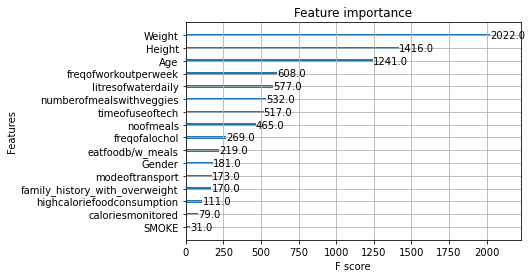

In [31]:
xgb.plot_importance(model)
plt.show()

In [32]:
model_predictions = model.predict(df_test)
model_predictions# Define the inverse mapping dictionary for obesity
inverse_mapping_dict_obesity = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight',
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}



# Convert the encoded predictions back to the original obesity types
original_predictions = [inverse_mapping_dict_obesity[prediction] for prediction in model_predictions]

# Print the original predictions
print(original_predictions)

['Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_III', 'Insufficient_Weight', 'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_III', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_I', 'Obesity_Type_III', 'Obesity_Type_I', 'Normal_Weight', 'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_II', 'Insufficient_Weight', 'Obesity_Type_I', 'Overweight_Level_II', 'Obesity_Type_III', 'Obesity_Type_I', 'Obesity_Type_II', 'Overweight_Level_I', 'Overweight_Level_I', 'Obesity_Type_I', 'Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight', 'Overweight_Level_II', 'Obesity_Type_II', 'Obesity_Type_I', 'Obesity_Ty

In [33]:
# Create a new DataFrame
df_predictions = pd.DataFrame({
    'id': df_test_original['id'],
    'NObeyesdad': original_predictions
})

# Display the DataFrame
print(df_predictions.head())

      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


In [34]:
df_predictions.to_csv('submission.csv', index=False)

In [35]:
os.getcwd()

'C:\\Users\\aqeel\\capstone project 2'